# Trabajo Final procesamiento de lenguaje natural (NLP) <a class="tocSkip">
## Universidad Pontificia Bolivariana <a class="tocSkip">

**Estudiante:** Paula Andrea Quintero Duque

**ID:** 1038415224



**Subir Este notebook de Trabajo Final en su repositorio de GitHub. y enviar el link en **Microsoft TEAMS**

Docente: [Jose R. Zapata](https://joserzapata.github.io)
- https://joserzapata.github.io
- https://www.linkedin.com/in/jose-ricardo-zapata-gonzalez/       


## Objetivo del Trabajo
Realizar un proceso de Procesamiento de lenguaje natural (NLP) para dejar los datos preparados para ser usados con algoritmos de Machine Learning para Clasificación como objetivo final del trabajo.

los datos preparados para ser usados con algoritmos de Machine Learning para Regresión o Clasificación como objetivo final del trabajo.

El trabajo se realizara en este jupyter notebook y subirlo a su repositorio de github creado en clase. (**Recuerde poner su nombre e información**)

## Las actividades a realizar
    

1) Limpiar los datos de texto.

   - https://joserzapata.github.io/courses/nlp/procesamiento-basico/

   - https://joserzapata.github.io/courses/nlp/preprocesamiento-texto/

2) Realizar la representación de texto:

   - https://joserzapata.github.io/courses/nlp/representaciones/

   - Tokenización
   - Lematización o stemming
   - Representación de los datos de texto (Bag of Words o TF-IDF)

3) Utilice un modelo de Machine Learning para clasificación para entrenar y evaluar el modelo.
        
    - Calcule estas las métricas de evaluación (accuracy, precision, recall, f1-score) - https://joserzapata.github.io/courses/python-ciencia-datos/clasificacion/#evaluacion-modelo-simple


    
   
    
*NOTA: No dude en contactarme para cualquier pregunta o inquietud :) por el chat de Teams o al correo
joser.zapata@upb.edu.co*

## EVALUACIÓN


|Porcentaje en la evaluación | Descripción| Nada | Incompleto | Completo 
| :---: |:---: |:---: |:---: |:---: 
| 5 % |**limpieza de los datos** |
| 5 % | **Representacion de los datos** |
| 5 % | **Machine Learning** <br> Entrenar y evaluar el modelo propuesto |


In [1]:
import pandas as pd

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
)
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
print(np.__version__)


1.26.4


Carga del dataset

El archivo  se carga en aproximadamente 10 segundos

In [3]:
# Usar su ID UPB Ejemplo: "0028984798"
id_upb = "000437185"

data_reviews = pd.read_parquet(
    "https://www.dropbox.com/scl/fi/gvk9yj8cn96oocr9z058x/filmaffinity_reviews_dataset.parquet?rlkey=xgvr00zvkxbkwqqavqutpsshg&st=xjb7xze9&dl=1"
)
data_reviews = data_reviews.sample(n=50_000, random_state=int(id_upb))
data_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 360 to 32353
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   author_review_desc  50000 non-null  string
 1   author_rating       50000 non-null  int64 
dtypes: int64(1), string(1)
memory usage: 1.1 MB


Ejemplo de algunas filas del dataset

In [4]:
data_reviews.sample(5)

,author_review_desc,author_rating
42464,"Bailes de katanas, tiroteos, violencia extrem...",7
146905,A pesar de que era una película que no llamab...,4
68051,Una película extraña de complicada estructur...,5
29775,"Así es, Bruce Willis nos demuestra una pelícu...",5
14062,"Decepcionado, me gusta mucho el comic, así qu...",2


Evaluar los valores nulos

In [5]:
data_reviews.isnull().sum()

author_review_desc    0
author_rating         0
dtype: int64

En este caso no hay nulos.

Revisar si hay valores duplicados:

In [6]:
data_reviews.duplicated().sum()

1

No hay  valores duplicados.

## Clasificación Tradicional para Análisis de Sentimientos y Categorías 👍 👎



Definición: Se considera reseña positiva cuando la puntuación ("author_rating") es mayor que 6; negativa en caso contrario.

Crear la variable binaria de sentimiento: 1 (positivo) si author_rating > 6, 0 (negativo) de lo contrario

In [7]:
UMBRAL = 6
data_reviews["sentiment_bin"] = (data_reviews["author_rating"] > UMBRAL).astype(int)

In [8]:
# Dividir los datos en conjuntos de entrenamiento y prueba

X_data = data_reviews["author_review_desc"]
y_data = data_reviews["sentiment_bin"]


Dividir el dataset en entrenamiento y prueba

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_data,
    y_data,
    test_size=0.2,
    stratify=y_data,  # Mantener la proporción de clases en ambos conjuntos
    random_state=42,
)

## Análisis exploratorio de los datos

para determinar que tipo de limpieza se debe realizar a los datos de texto de `X_train`

In [10]:
print(f"Cantidad de reseñas de entrenamiento: {len(X_train)}")
X_train.head(10)

Cantidad de reseñas de entrenamiento: 40000


5358      
El director italiano nos presenta la historia...
119764    
“Los mejores años de nuestra vida” es una exc...
137390    
Hoy he ido a verla. Estéticamente me ha gusta...
99158     
Extraño título para un western este de "Sangr...
72784     
Robert Parrish leyó la novela The wonderful c...
107438    
El Pregón es una comedia española que, sin qu...
120350    
Una mujer solitaria y muda va por las noches ...
65873     
Sigue la "gira europea" de Allen. Tras Londre...
58579     
Es la mejor interpretación que he visto de In...
81669     
Unas sombras, una pelea. Un muerto, un policí...
Name: author_review_desc, dtype: string

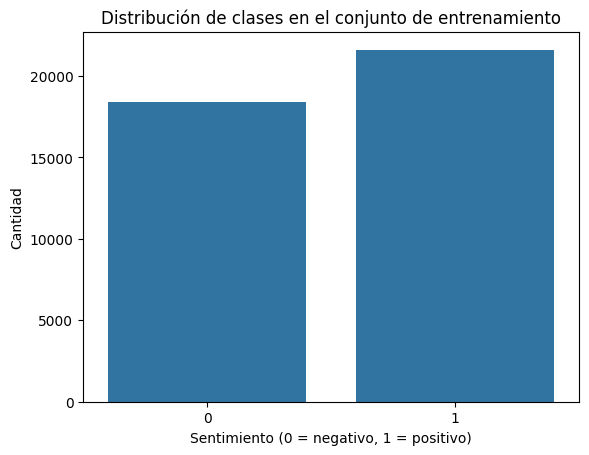

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y_train)
plt.title("Distribución de clases en el conjunto de entrenamiento")
plt.xlabel("Sentimiento (0 = negativo, 1 = positivo)")
plt.ylabel("Cantidad")
plt.show()


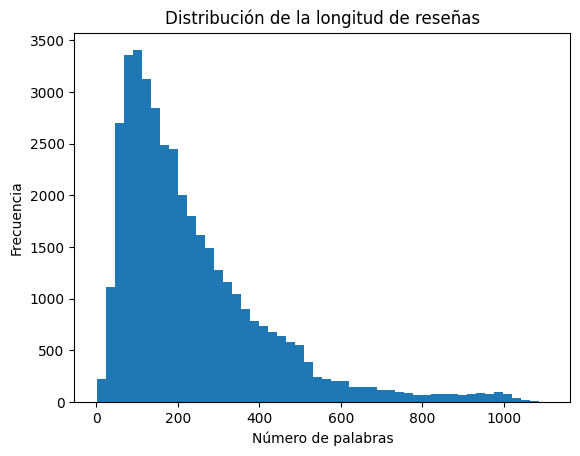

Longitud media de las reseñas: 237.784125
Longitud mínima: 2
Longitud máxima: 1108


In [12]:
X_train_length = X_train.apply(lambda x: len(str(x).split()))
plt.hist(X_train_length, bins=50)
plt.title("Distribución de la longitud de reseñas")
plt.xlabel("Número de palabras")
plt.ylabel("Frecuencia")
plt.show()

print("Longitud media de las reseñas:", X_train_length.mean())
print("Longitud mínima:", X_train_length.min())
print("Longitud máxima:", X_train_length.max())


## 1) Limpieza de los datos de texto

Tomar los datos de `X_train` y aplicar las funciones de limpieza que considere necesarias

Ayudas:

- Convertir a minúsculas
- Eliminar caracteres especiales y números
- Corregir palabras mal escritas
- etc


In [20]:
import re
import unicodedata
from spellchecker import SpellChecker

def limpiar_texto(texto):
    # Asegurar que sea string
    texto = str(texto)
    
    # 1. Convertir a minúsculas
    texto = texto.lower()
    
    # 2. Eliminar tildes y acentos
    texto = unicodedata.normalize('NFKD', texto).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    # 3. Eliminar URLs
    texto = re.sub(r'http\S+|www\S+|https\S+', '', texto)
    
    # 4. Eliminar menciones, hashtags y caracteres especiales
    texto = re.sub(r'[@#]\w+', '', texto)
    
    # 5. Eliminar números
    texto = re.sub(r'\d+', '', texto)
    
    # 6. Eliminar signos de puntuación
    texto = re.sub(r'[^\w\s]', '', texto)
    
    # 7. Eliminar espacios extra
    texto = re.sub(r'\s+', ' ', texto).strip()
    
    # 🚀 IMPORTANTE: devolver el texto limpio
    return texto

# Aplicar función al conjunto de entrenamiento
X_train_limpio = X_train.apply(limpiar_texto)

# Mostrar ejemplos antes y después
pd.DataFrame({
    "original": X_train.sample(5, random_state=42).values,
    "limpio": X_train_limpio.sample(5, random_state=42).values
})

,original,limpio
0,"El problema de ""Passengers"" es habitual en el...",el problema de passengers es habitual en el ci...
1,"En los últimos años del franquismo, la censur...",en los ultimos anos del franquismo la censura ...
2,Estando en Sitges nos volvemos a poner a la c...,estando en sitges nos volvemos a poner a la co...
3,Debo decir que no me explico cómo el insensat...,debo decir que no me explico como el insensato...
4,"En 1997, el Instituto Nacional de Normas y Te...",en el instituto nacional de normas y tecnologi...


In [17]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 27.5 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


## 2) Representacion del texto

Luego de tener los datos limpios, realizar la representación de los datos de texto para poder usarse en modelos de machine learning.

In [25]:
# Aplicar la misma limpieza al conjunto de prueba
X_test_limpio = X_test.apply(limpiar_texto)

import nltk
from nltk.corpus import stopwords

# Descargar las stopwords en español (solo la primera vez)
nltk.download('stopwords')

# Cargar las stopwords en español
spanish_stopwords = stopwords.words('spanish')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
####vectorizar las palabras
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    stop_words=spanish_stopwords
)

X_train_tfidf = vectorizer.fit_transform(X_train_limpio)
X_test_tfidf = vectorizer.transform(X_test_limpio)

print(f"Shape de X_train_tfidf: {X_train_tfidf.shape}")
print(f"Shape de X_test_tfidf: {X_test_tfidf.shape}")


Shape de X_train_tfidf: (40000, 5000)
Shape de X_test_tfidf: (10000, 5000)


## 3) Entrenar un modelo de machine learning de clasificación

Utilizar un modelo de clasificación para entrenar y evaluar el modelo con los datos preparados.


🔹 Exactitud (Accuracy): 0.7991

🔹 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      4599
           1       0.80      0.84      0.82      5401

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



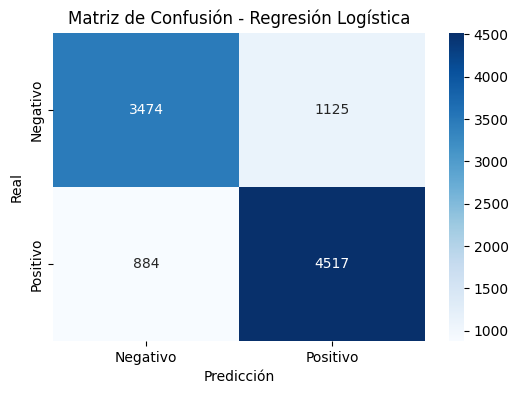

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenar modelo de Regresión Logística
modelo = LogisticRegression(max_iter=1000, random_state=42)
modelo.fit(X_train_tfidf, y_train)

# Predecir en el conjunto de prueba
y_pred = modelo.predict(X_test_tfidf)

# Métricas
print("🔹 Exactitud (Accuracy):", accuracy_score(y_test, y_pred))
print("\n🔹 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

### Evaluar el modelo con los datos de prueba

Usar el modelo para predecir en `X_test` y evaluar con `y_test`

**Nota:** Recuerde que `X_test` debe pasar por los mismos procesos de limpieza y representación que `X_train`

In [28]:
# Limpiar el conjunto de prueba con la misma función
X_test_limpio = X_test.apply(limpiar_texto)

# Transformar los datos de prueba usando el mismo vectorizador
X_test_tfidf = vectorizer.transform(X_test_limpio)


🔹 Exactitud (Accuracy): 0.7991

🔹 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      4599
           1       0.80      0.84      0.82      5401

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



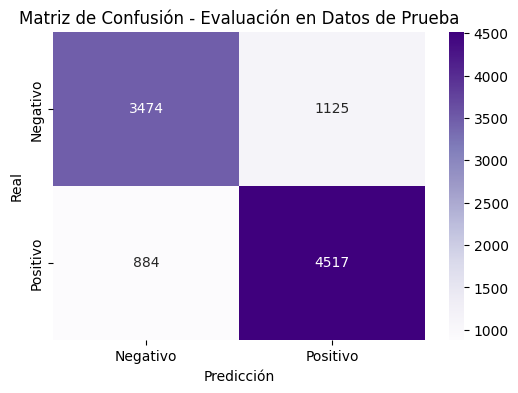

In [29]:
# Predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test_tfidf)

# Métricas de evaluación
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("🔹 Exactitud (Accuracy):", accuracy_score(y_test, y_pred))
print("\n🔹 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Negativo', 'Positivo'], 
            yticklabels=['Negativo', 'Positivo'])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Evaluación en Datos de Prueba")
plt.show()


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

**Guardar el modelo**

In [30]:
import joblib

## Librerías Usadas

In [31]:
from watermark import watermark

print(watermark(python=True, iversions=True, globals_=globals()))

ModuleNotFoundError: No module named 'watermark'

---

## Referencias
- [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
- [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
- [Classification of text documents using sparse features](https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html)
- Ejemplo de Entrenamiento y selección de Modelo de machine learning entre varios modelos <https://joserzapata.github.io/post/ciencia-datos-proyecto-python/6-model_selection/>
- https://joserzapata.github.io/courses/python-ciencia-datos/python/
- https://joserzapata.github.io/courses/python-ciencia-datos/pandas/
- https://joserzapata.github.io/courses/python-ciencia-datos/machine-learning/

Docente: [Jose R. Zapata](https://joserzapata.github.io)

- [https://joserzapata.github.io/](https://joserzapata.github.io/)
- [https://www.linkedin.com/in/jose-ricardo-zapata-gonzalez/](https://www.linkedin.com/in/jose-ricardo-zapata-gonzalez/)